In [ ]:
print('Baseline')

# This is so that you don't have to restart the kernel everytime you edit hmm.py

%load_ext autoreload
%autoreload 2

Baseline


In [2]:
!pip install datasets transformers sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 13.8 MB/s 
     |████████████████████████████████| 5.8 MB 63.1 MB/s 
     |████████████████████████████████| 212 kB 78.8 MB/s 
     |████████████████████████████████| 132 kB 70.0 MB/s 
     |████████████████████████████████| 182 kB 83.0 MB/s 
     |████████████████████████████████| 127 kB 81.3 MB/s 
     |████████████████████████████████| 7.6 MB 56.6 MB/s 
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=33469a0f3c147439c9029491495d81cbbc3186e111e38b7b8a0805573011877b
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [3]:
from preprocess import load_arguments, load_label, load_values_from_json, combine_columns, split_arguments
from model import train_bert_model
import os

# Load arguments
df_arguments = load_arguments('data/arguments-training.tsv')

# Load json
human_values = load_values_from_json('data/value-categories.json')

df_labels = load_label("data/labels-training.tsv", human_values["1"])
df_full_level = combine_columns(df_arguments, df_labels)
# train_arguments, valid_arguments = split_arguments(df_full_level)

train_arguments = df_full_level

df_valid_arguments = load_arguments('data/arguments-validation.tsv')
df_valid_labels = load_label("data/labels-validation.tsv", human_values["1"])
df_valid_full_level = combine_columns(df_valid_arguments, df_valid_labels)

valid_arguments = df_valid_full_level

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

## Random Baseline

In [34]:
from pprint import pprint

from baseline import random_prediction
from model import compute_metrics
from utils import extract_true_labels



random_prediction_values = random_prediction(human_values['1'], valid_arguments)

rand_metrics = compute_metrics((random_prediction_values, 
                           extract_true_labels(valid_arguments, human_values['1'])), human_values['1'])

pprint(rand_metrics)

Random Prediction
Added predictions for 1896 arguments
{'accuracy_thresh': 0.27600210905075073,
 'avg-precision': 0.17,
 'avg-recall': 0.83,
 'f1-score': {'Achievement': 0.44,
              'Benevolence: caring': 0.47,
              'Benevolence: dependability': 0.25,
              'Conformity: interpersonal': 0.06,
              'Conformity: rules': 0.37,
              'Face': 0.13,
              'Hedonism': 0.1,
              'Humility': 0.13,
              'Power: dominance': 0.16,
              'Power: resources': 0.12,
              'Security: personal': 0.54,
              'Security: societal': 0.39,
              'Self-direction: action': 0.41,
              'Self-direction: thought': 0.24,
              'Stimulation': 0.11,
              'Tradition': 0.17,
              'Universalism: concern': 0.48,
              'Universalism: nature': 0.12,
              'Universalism: objectivity': 0.32,
              'Universalism: tolerance': 0.2,
              'avg-f1-score': 0.26},
 'ma

## All 1 predictions


In [33]:
from baseline import all_ones

one_values = all_ones(human_values['1'], valid_arguments)

base_metrics = compute_metrics((one_values, 
                           extract_true_labels(valid_arguments, human_values['1'])), human_values['1'])

pprint(base_metrics)

Predicting all 1
Added predictions for 1896 arguments
{'accuracy_thresh': 0.16769514977931976,
 'avg-precision': 0.17,
 'avg-recall': 1.0,
 'f1-score': {'Achievement': 0.47,
              'Benevolence: caring': 0.5,
              'Benevolence: dependability': 0.25,
              'Conformity: interpersonal': 0.06,
              'Conformity: rules': 0.39,
              'Face': 0.13,
              'Hedonism': 0.1,
              'Humility': 0.13,
              'Power: dominance': 0.16,
              'Power: resources': 0.13,
              'Security: personal': 0.57,
              'Security: societal': 0.41,
              'Self-direction: action': 0.41,
              'Self-direction: thought': 0.23,
              'Stimulation': 0.14,
              'Tradition': 0.17,
              'Universalism: concern': 0.53,
              'Universalism: nature': 0.13,
              'Universalism: objectivity': 0.33,
              'Universalism: tolerance': 0.21,
              'avg-f1-score': 0.27},
 'marc

In [6]:
bert_model_evaluation = train_bert_model(train_arguments, os.path.join('model/'), human_values['1'], valid_arguments)
print(bert_model_evaluation['eval_f1-score'])

  0%|          | 0/5393 [00:00<?, ?ex/s]

  0%|          | 0/1896 [00:00<?, ?ex/s]

  0%|          | 0/6 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Step,Training Loss,Validation Loss,Accuracy Thresh,F1-score,Marco-avg-f1score,Precision,Avg-precision,Recall,Avg-recall
500,0.409200,0.363624,0.852927,"{'Achievement': 0.48, 'Benevolence: caring': 0.1, 'Benevolence: dependability': 0.0, 'Conformity: interpersonal': 0.0, 'Conformity: rules': 0.0, 'Face': 0.0, 'Hedonism': 0.0, 'Humility': 0.0, 'Power: dominance': 0.0, 'Power: resources': 0.0, 'Security: personal': 0.71, 'Security: societal': 0.57, 'Self-direction: action': 0.24, 'Self-direction: thought': 0.28, 'Stimulation': 0.0, 'Tradition': 0.09, 'Universalism: concern': 0.59, 'Universalism: nature': 0.0, 'Universalism: objectivity': 0.0, 'Universalism: tolerance': 0.0, 'avg-f1-score': 0.15}",0.150000,"{'Achievement': 0.68, 'Benevolence: caring': 0.9, 'Benevolence: dependability': 0.0, 'Conformity: interpersonal': 0.0, 'Conformity: rules': 0.0, 'Face': 0.0, 'Hedonism': 0.0, 'Humility': 0.0, 'Power: dominance': 0.0, 'Power: resources': 0.0, 'Security: personal': 0.67, 'Security: societal': 0.64, 'Self-direction: action': 0.58, 'Self-direction: thought': 0.63, 'Stimulation': 0.0, 'Tradition': 1.0, 'Universalism: concern': 0.68, 'Universalism: nature': 0.0, 'Universalism: objectivity': 0.0, 'Universalism: tolerance': 0.0, 'avg-precision': 0.29}",0.290000,"{'Achievement': 0.38, 'Benevolence: caring': 0.06, 'Benevolence: dependability': 0.0, 'Conformity: interpersonal': 0.0, 'Conformity: rules': 0.0, 'Face': 0.0, 'Hedonism': 0.0, 'Humility': 0.0, 'Power: dominance': 0.0, 'Power: resources': 0.0, 'Security: personal': 0.75, 'Security: societal': 0.52, 'Self-direction: action': 0.15, 'Self-direction: thought': 0.18, 'Stimulation': 0.0, 'Tradition': 0.05, 'Universalism: concern': 0.53, 'Universalism: nature': 0.0, 'Universalism: objectivity': 0.0, 'Universalism: tolerance': 0.0, 'avg-recall': 0.13}",0.130000
1000,0.339600,0.343432,0.861419,"{'Achievement': 0.6, 'Benevolence: caring': 0.38, 'Benevolence: dependability': 0.0, 'Conformity: interpersonal': 0.0, 'Conformity: rules': 0.36, 'Face': 0.0, 'Hedonism': 0.02, 'Humility': 0.0, 'Power: dominance': 0.0, 'Power: resources': 0.31, 'Security: personal': 0.73, 'Security: societal': 0.63, 'Self-direction: action': 0.34, 'Self-direction: thought': 0.34, 'Stimulation': 0.0, 'Tradition': 0.22, 'Universalism: concern': 0.58, 'Universalism: nature': 0.43, 'Universalism: objectivity': 0.11, 'Universalism: tolerance': 0.0, 'avg-f1-score': 0.25}",0.250000,"{'Achievement': 0.68, 'Benevolence: caring': 0.76, 'Benevolence: dependability': 0.0, 'Conformity: interpersonal': 0.0, 'Conformity: rules': 0.62, 'Face': 0.0, 'Hedonism': 0.5, 'Humility': 0.0, 'Power: dominance': 0.0, 'Power: resources': 0.51, 'Security: personal': 0.65, 'Security: societal': 0.66, 'Self-direction: action': 0.7, 'Self-direction: thought': 0.82, 'Stimulation': 0.0, 'Tradition': 0.92, 'Universalism: concern': 0.69, 'Universalism: nature': 0.86, 'Universalism: objectivity': 0.78, 'Universalism: tolerance': 0.0, 'avg-precision': 0.46}",0.460000,"{'Achievement': 0.54, 'Benevolence: caring': 0.26, 'Benevolence: dependability': 0.0, 'Conformity: interpersonal': 0.0, 'Conformity: rules': 0.25, 'Face': 0.0, 'Hedonism': 0.01, 'Humility': 0.0, 'Power: dominance': 0.0, 'Power: resources': 0.23, 'Security: personal': 0.83, 'Security: societal': 0.6, 'Self-direction: action': 0.23, 'Self-direction: thought': 0.22, 'Stimulation': 0.0, 'Tradition': 0.13, 'Universalism: concern': 0.5, 'Universalism: nature': 0.28, 'Universalism: objectivity': 0.06, 'Universalism: tolerance': 0.0, 'avg-recall': 0.21}",0.210000
1500,0.308900,0.333301,0.864979,"{'Achievement': 0.61, 'Benevolence: caring': 0.41, 'Benevolence: dependability': 0.0, 'Conformity: interpersonal': 0.0, 'Conformity: rules': 0.34, 'Face': 0.0, 'Hedonism': 0.12, 'Humility': 0.0, 'Power: dominance': 0.06, 'Power: resources': 0.41, 'Security: personal': 0.73, 'Security: societal': 0.63, 'Self-direction: action': 0.48, 'Self-direction: thought': 0.45, 'Stimulation': 0.04, 'Tradition': 0.34,

***** Running Evaluation *****
  Num examples = 1896
  Batch size = 8
Trainer is attempting to log a value of "{'Achievement': 0.48, 'Benevolence: caring': 0.1, 'Benevolence: dependability': 0.0, 'Conformity: interpersonal': 0.0, 'Conformity: rules': 0.0, 'Face': 0.0, 'Hedonism': 0.0, 'Humility': 0.0, 'Power: dominance': 0.0, 'Power: resources': 0.0, 'Security: personal': 0.71, 'Security: societal': 0.57, 'Self-direction: action': 0.24, 'Self-direction: thought': 0.28, 'Stimulation': 0.0, 'Tradition': 0.09, 'Universalism: concern': 0.59, 'Universalism: nature': 0.0, 'Universalism: objectivity': 0.0, 'Universalism: tolerance': 0.0, 'avg-f1-score': 0.15}" of type <class 'dict'> for key "eval/f1-score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'Achievement': 0.68, 'Benevolence: caring': 0.9, 'Benevolence: dependability': 0.0, 'Conformity: interpersonal': 0.0, 'Conformity: rules': 0

Trainer is attempting to log a value of "{'Achievement': 0.62, 'Benevolence: caring': 0.57, 'Benevolence: dependability': 0.22, 'Conformity: interpersonal': 0.19, 'Conformity: rules': 0.45, 'Face': 0.09, 'Hedonism': 0.27, 'Humility': 0.05, 'Power: dominance': 0.25, 'Power: resources': 0.46, 'Security: personal': 0.72, 'Security: societal': 0.62, 'Self-direction: action': 0.53, 'Self-direction: thought': 0.48, 'Stimulation': 0.19, 'Tradition': 0.44, 'Universalism: concern': 0.63, 'Universalism: nature': 0.64, 'Universalism: objectivity': 0.46, 'Universalism: tolerance': 0.23, 'avg-f1-score': 0.41}" of type <class 'dict'> for key "eval/f1-score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'Achievement': 0.67, 'Benevolence: caring': 0.55, 'Benevolence: dependability': 0.29, 'Conformity: interpersonal': 0.5, 'Conformity: rules': 0.56, 'Face': 0.39, 'Hedonism': 0.56, 'Humility': 0.15, 

{'Achievement': 0.62, 'Benevolence: caring': 0.57, 'Benevolence: dependability': 0.22, 'Conformity: interpersonal': 0.19, 'Conformity: rules': 0.45, 'Face': 0.09, 'Hedonism': 0.27, 'Humility': 0.05, 'Power: dominance': 0.25, 'Power: resources': 0.46, 'Security: personal': 0.72, 'Security: societal': 0.62, 'Self-direction: action': 0.53, 'Self-direction: thought': 0.48, 'Stimulation': 0.19, 'Tradition': 0.44, 'Universalism: concern': 0.63, 'Universalism: nature': 0.64, 'Universalism: objectivity': 0.46, 'Universalism: tolerance': 0.23, 'avg-f1-score': 0.41}


In [9]:
print(bert_model_evaluation)

{'eval_loss': 0.4795643389225006, 'eval_accuracy_thresh': 0.8588080406188965, 'eval_f1-score': {'Achievement': 0.62, 'Benevolence: caring': 0.57, 'Benevolence: dependability': 0.22, 'Conformity: interpersonal': 0.19, 'Conformity: rules': 0.45, 'Face': 0.09, 'Hedonism': 0.27, 'Humility': 0.05, 'Power: dominance': 0.25, 'Power: resources': 0.46, 'Security: personal': 0.72, 'Security: societal': 0.62, 'Self-direction: action': 0.53, 'Self-direction: thought': 0.48, 'Stimulation': 0.19, 'Tradition': 0.44, 'Universalism: concern': 0.63, 'Universalism: nature': 0.64, 'Universalism: objectivity': 0.46, 'Universalism: tolerance': 0.23, 'avg-f1-score': 0.41}, 'eval_marco-avg-f1score': 0.41, 'eval_precision': {'Achievement': 0.67, 'Benevolence: caring': 0.55, 'Benevolence: dependability': 0.29, 'Conformity: interpersonal': 0.5, 'Conformity: rules': 0.56, 'Face': 0.39, 'Hedonism': 0.56, 'Humility': 0.15, 'Power: dominance': 0.45, 'Power: resources': 0.49, 'Security: personal': 0.7, 'Security: soc

In [10]:
from model import predict_bert_model
pred = predict_bert_model(valid_arguments, os.path.join('model/'), human_values['1'])

  0%|          | 0/1896 [00:00<?, ?ex/s]

  0%|          | 0/1896 [00:00<?, ?ex/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
loading configuration file model/config.json
Model config BertConfig {
  "_name_or_path": "model/",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11",
    "12": "LABEL_12",
    "13": "LABEL_13",
    "14": "LABEL_14",
    "15": "LABEL_15",
    "16": "LAB

In [ ]:
from pprint import pprint

In [11]:
pprint(pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])


In [12]:
metrics = compute_metrics((pred, 
                           extract_true_labels(valid_arguments, human_values['1'])), human_values['1'])
from pprint import pprint
pprint(metrics)

{'accuracy_thresh': 0.8625791072845459,
 'avg-precision': 0.57,
 'avg-recall': 0.32,
 'f1-score': {'Achievement': 0.6,
              'Benevolence: caring': 0.56,
              'Benevolence: dependability': 0.2,
              'Conformity: interpersonal': 0.14,
              'Conformity: rules': 0.43,
              'Face': 0.06,
              'Hedonism': 0.22,
              'Humility': 0.06,
              'Power: dominance': 0.21,
              'Power: resources': 0.43,
              'Security: personal': 0.72,
              'Security: societal': 0.62,
              'Self-direction: action': 0.51,
              'Self-direction: thought': 0.45,
              'Stimulation': 0.18,
              'Tradition': 0.4,
              'Universalism: concern': 0.63,
              'Universalism: nature': 0.64,
              'Universalism: objectivity': 0.42,
              'Universalism: tolerance': 0.2,
              'avg-f1-score': 0.38},
 'marco-avg-f1score': 0.38,
 'precision': {'Achievement': 0.68

In [14]:
from model import get_met
print(get_met())

[{'accuracy_thresh': 0.8529272079467773, 'f1-score': {'Achievement': 0.48, 'Benevolence: caring': 0.1, 'Benevolence: dependability': 0.0, 'Conformity: interpersonal': 0.0, 'Conformity: rules': 0.0, 'Face': 0.0, 'Hedonism': 0.0, 'Humility': 0.0, 'Power: dominance': 0.0, 'Power: resources': 0.0, 'Security: personal': 0.71, 'Security: societal': 0.57, 'Self-direction: action': 0.24, 'Self-direction: thought': 0.28, 'Stimulation': 0.0, 'Tradition': 0.09, 'Universalism: concern': 0.59, 'Universalism: nature': 0.0, 'Universalism: objectivity': 0.0, 'Universalism: tolerance': 0.0, 'avg-f1-score': 0.15}, 'marco-avg-f1score': 0.15, 'precision': {'Achievement': 0.68, 'Benevolence: caring': 0.9, 'Benevolence: dependability': 0.0, 'Conformity: interpersonal': 0.0, 'Conformity: rules': 0.0, 'Face': 0.0, 'Hedonism': 0.0, 'Humility': 0.0, 'Power: dominance': 0.0, 'Power: resources': 0.0, 'Security: personal': 0.67, 'Security: societal': 0.64, 'Self-direction: action': 0.58, 'Self-direction: thought':

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import matplotlib.pyplot as pllt

In [15]:
print(len(get_met()))

31


In [19]:
y_axis = []
for i in get_met():
  y_axis.append(i['marco-avg-f1score'])
print(y_axis)

[0.15, 0.25, 0.31, 0.33, 0.36, 0.36, 0.37, 0.36, 0.38, 0.38, 0.38, 0.38, 0.38, 0.39, 0.39, 0.38, 0.39, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.41, 0.4, 0.4, 0.41, 0.27, 0.28, 0.38]


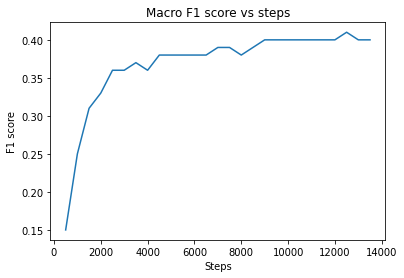

In [22]:
x_axis = [x for x in range(500, 14000, 500)]
pllt.plot(x_axis, y_axis[:-4])
pllt.xlabel("Steps")
pllt.ylabel("F1 score")
pllt.title("Macro F1 score vs steps")
pllt.show()

In [23]:
y_axis = []
for i in get_met():
  y_axis.append(i['avg-precision'])
print(y_axis)

[0.29, 0.46, 0.51, 0.56, 0.53, 0.54, 0.53, 0.55, 0.53, 0.55, 0.55, 0.57, 0.54, 0.53, 0.54, 0.56, 0.54, 0.53, 0.54, 0.54, 0.55, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.17, 0.17, 0.57]


In [24]:
y_axis = []
for i in get_met():
  y_axis.append(i['avg-recall'])
print(y_axis)

[0.13, 0.21, 0.26, 0.28, 0.3, 0.32, 0.32, 0.3, 0.33, 0.33, 0.34, 0.32, 0.34, 0.35, 0.35, 0.33, 0.34, 0.35, 0.35, 0.35, 0.35, 0.35, 0.36, 0.35, 0.36, 0.35, 0.36, 0.36, 0.83, 1.0, 0.32]


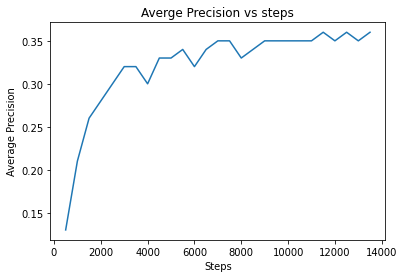

In [26]:
x_axis = [x for x in range(500, 14000, 500)]
pllt.plot(x_axis, y_axis[:-4])
pllt.xlabel("Steps")
pllt.ylabel("Average Precision")
pllt.title("Averge Precision vs steps")
pllt.show()

In [35]:
labels_x = []
f1_premise_per = []
f1_baseline_per = []
f1_random_per = []

for k, v in metrics['f1-score'].items():
    labels_x.append(k)
    f1_premise_per.append(v)
for k, v in base_metrics['f1-score'].items():
    f1_baseline_per.append(v)
for k, v in rand_metrics['f1-score'].items():
    f1_random_per.append(v)

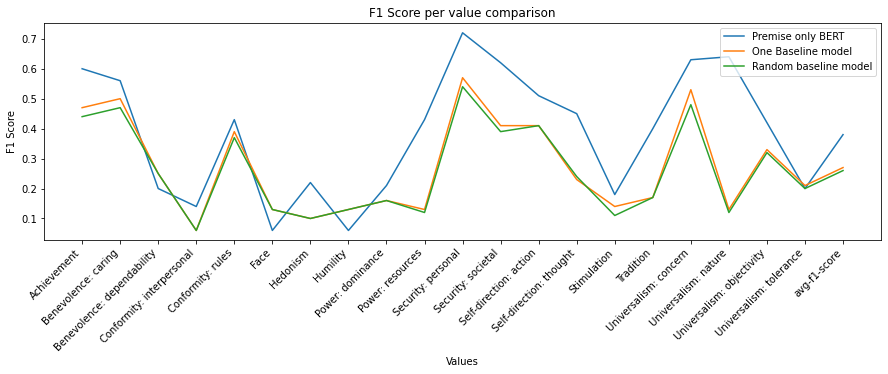

In [36]:
fig, ax = pllt.subplots()
ax.plot(labels_x, f1_premise_per, label="Premise only BERT")
ax.plot(labels_x, f1_baseline_per, label="One Baseline model")
ax.plot(labels_x, f1_random_per, label="Random baseline model")
fig.set_figwidth(15)
pllt.xlabel("Values")
pllt.xticks(rotation=45, ha='right')
pllt.ylabel("F1 Score")
pllt.title("F1 Score per value comparison")
pllt.legend()
pllt.show()